# CREACIÓN DEL DATAMART ANALÍTICO

Como buena práctica recomiendo hacer primero la calidad de datos individual de cada tabla, sobre todo porque si el volumen fuera muy alto al unirlos todavía se multiplica más.

Por tanto inicialmente las tablas quedan individuales, después aplico calidad de datos y finalmente se unen para forma el tablón o más oficialmente el datamart analítico.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\dt_i01626\AppData\Local\Temp\ipykernel_31584\3299090373.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## IMPORTACION DE DATOS

### Datos internos

Crear la conexión a la base de datos

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb2.db')

Documentación de SqlAlchemy para la función inspect.

https://docs.sqlalchemy.org/en/14/core/reflection.html#fine-grained-reflection-with-inspector

In [3]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df', 'listings', 'listings_det', 'precio_m2']

In [4]:
for tabla in tablas:
    exec(f'{tabla} = pd.read_sql(tabla, con)')

In [5]:
for tabla in tablas:
    print(tabla +': ' + str(eval(tabla).shape))

df: (20064, 25)
listings: (33490, 19)
listings_det: (33490, 76)
precio_m2: (47, 3)


### Datos Externos

Con los datos que contamos, no tiene en cuenta el precio de compra de un inmueble, pero lo destacamos como una de las palancas principales.

Por lo tanto se obtenemos estos datos de forma externa.

En esta página tenemos justo la info que necesitamos: https://www.ambito.com/economia/ventas-departamentos-caba-aseguran-que-los-precios-subieron-primera-vez-mas-4-anos-n5784484

Podemos extraerla de forma sencilla con el plugin instant data scraper de Chrome, y guardarla en nuestra carpeta Datos con el nombre 'ambito.csv'

In [6]:
precio_m2 = precio_m2 = pd.read_csv('../Datos/ambito.csv') \
    .rename(columns = {'tablescraper-selected-row':'barrio'})
precio_m2

,barrio
0,Lugano: u$s1.016 por m2
1,Nueva Pompeya: u$s1.391 por m2
2,La Boca: u$s1.439 por m2
3,Villa Riachuelo: u$s1.471 por m2
4,Parque Avellaneda: u$s1.480 por m2
5,Floresta: u$s1.606 por m2
6,Parque Patricios: u$s1.612 por m2
7,Balvanera: u$s1.628 por m2
8,Constitución: u$s1.650 por m2
9,San Cristóbal: u$s1.664 por m2


In [7]:
precio_m2 = precio_m2.barrio.str.split(pat =':', expand = True)
precio_m2

,0,1
0,Lugano,u$s1.016 por m2
1,Nueva Pompeya,u$s1.391 por m2
2,La Boca,u$s1.439 por m2
3,Villa Riachuelo,u$s1.471 por m2
4,Parque Avellaneda,u$s1.480 por m2
5,Floresta,u$s1.606 por m2
6,Parque Patricios,u$s1.612 por m2
7,Balvanera,u$s1.628 por m2
8,Constitución,u$s1.650 por m2
9,San Cristóbal,u$s1.664 por m2


In [8]:
precio_m2 = precio_m2.rename( columns = {0:'barrio', 1:'precio_m2'})
precio_m2

,barrio,precio_m2
0,Lugano,u$s1.016 por m2
1,Nueva Pompeya,u$s1.391 por m2
2,La Boca,u$s1.439 por m2
3,Villa Riachuelo,u$s1.471 por m2
4,Parque Avellaneda,u$s1.480 por m2
5,Floresta,u$s1.606 por m2
6,Parque Patricios,u$s1.612 por m2
7,Balvanera,u$s1.628 por m2
8,Constitución,u$s1.650 por m2
9,San Cristóbal,u$s1.664 por m2


In [9]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   barrio     47 non-null     object
 1   precio_m2  47 non-null     object
dtypes: object(2)
memory usage: 884.0+ bytes


In [10]:
precio_m2.precio_m2 = precio_m2.precio_m2.str.split(pat = 's', expand = True)[1]

In [11]:
precio_m2.precio_m2 = precio_m2.precio_m2.str.split(expand = True)[0]

In [12]:
precio_m2.precio_m2 = precio_m2.precio_m2.str.replace('.','').astype(int)

In [13]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   barrio     47 non-null     object
 1   precio_m2  47 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 696.0+ bytes


In [14]:
precio_m2.head()

,barrio,precio_m2
0,Lugano,1016
1,Nueva Pompeya,1391
2,La Boca,1439
3,Villa Riachuelo,1471
4,Parque Avellaneda,1480


Se guardan en la base de datos, estos precios del m2 por barrio.

In [15]:
precio_m2.to_sql('precio_m2', con = con, if_exists = 'replace')

47

comprobando...

In [16]:
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df', 'listings', 'listings_det', 'precio_m2']

In [17]:
for tabla in tablas:
    exec(f'{tabla} = pd.read_sql(tabla, con)')

In [18]:
for tabla in tablas:
    print(tabla +': ' + str(eval(tabla).shape))

df: (20064, 25)
listings: (33490, 19)
listings_det: (33490, 76)
precio_m2: (47, 3)


## CALIDAD DE DATOS

### Tabla listings

#### Visión general

In [19]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,None
1,1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,None
2,2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,0,None,NaN,1,0,0,None
3,3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,None
4,4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,None


In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           33490 non-null  int64  
 1   id                              33490 non-null  int64  
 2   name                            33490 non-null  object 
 3   host_id                         33490 non-null  int64  
 4   host_name                       33480 non-null  object 
 5   neighbourhood_group             0 non-null      float64
 6   neighbourhood                   33490 non-null  object 
 7   latitude                        33490 non-null  float64
 8   longitude                       33490 non-null  float64
 9   room_type                       33490 non-null  object 
 10  price                           32508 non-null  float64
 11  minimum_nights                  33490 non-null  int64  
 12  number_of_reviews               

#### Variables y tipos

Vamos a eliminar aquellas variables que no necesitaremos directamente para nuestros objetivos.

In [21]:
a_eliminar = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'neighbourhood_group',
               'license']
listings.drop(columns = a_eliminar, inplace = True)

In [22]:
listings.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,1,298
1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,8,161
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,1,0
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,9,0
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,4,92


Revisamos los tipos de variable

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33490 non-null  int64  
 1   name                            33490 non-null  object 
 2   host_id                         33490 non-null  int64  
 3   neighbourhood                   33490 non-null  object 
 4   latitude                        33490 non-null  float64
 5   longitude                       33490 non-null  float64
 6   room_type                       33490 non-null  object 
 7   price                           32508 non-null  float64
 8   minimum_nights                  33490 non-null  int64  
 9   calculated_host_listings_count  33490 non-null  int64  
 10  availability_365                33490 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.8+ MB


Pasar algunas objeto (neighbourhood, room_type) a categóricas.

In [24]:
for variable in ['neighbourhood', 'room_type']:
    listings[variable] = listings[variable].astype('category')

Comprobamos

In [25]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              33490 non-null  int64   
 1   name                            33490 non-null  object  
 2   host_id                         33490 non-null  int64   
 3   neighbourhood                   33490 non-null  category
 4   latitude                        33490 non-null  float64 
 5   longitude                       33490 non-null  float64 
 6   room_type                       33490 non-null  category
 7   price                           32508 non-null  float64 
 8   minimum_nights                  33490 non-null  int64   
 9   calculated_host_listings_count  33490 non-null  int64   
 10  availability_365                33490 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(1)
memory usage: 2.4+ MB


#### Análisis de nulos

PRICE tiene 982 nulos (probablemente los eliminamos)

In [26]:
listings.isna().mean().sort_values(ascending = False)*100

price                             2.932219
id                                0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

**Los registros que no tienen price, representan un 3% del total.**

Eliminamos los registros con precio nulos.

In [27]:
listings.dropna(axis = 0, inplace = True)

In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32508 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              32508 non-null  int64   
 1   name                            32508 non-null  object  
 2   host_id                         32508 non-null  int64   
 3   neighbourhood                   32508 non-null  category
 4   latitude                        32508 non-null  float64 
 5   longitude                       32508 non-null  float64 
 6   room_type                       32508 non-null  category
 7   price                           32508 non-null  float64 
 8   minimum_nights                  32508 non-null  int64   
 9   calculated_host_listings_count  32508 non-null  int64   
 10  availability_365                32508 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(1)
memory usage: 2.5+ MB


#### Análisis de duplicados

Comprobamos si hay algún registro duplicado

In [29]:
listings.duplicated().sum()

0

#### Análisis de variables categóricas

Vamos a analizar los valores y las frecuencias de las variables categóricas

In [30]:
listings.neighbourhood.value_counts()

neighbourhood
Palermo              10658
Recoleta              4816
San Nicolas           1969
Belgrano              1780
Retiro                1538
Monserrat             1424
Almagro               1194
Balvanera             1139
Villa Crespo          1092
San Telmo              880
Nuñez                  734
Colegiales             727
Caballito              662
Chacarita              539
Villa Urquiza          418
Constitucion           415
Puerto Madero          346
Barracas               247
Saavedra               230
San Cristobal          205
Flores                 144
Coghlan                130
Villa Ortuzar          120
Villa Del Parque       111
Villa Devoto           110
Boca                   108
Boedo                   96
Parque Chacabuco        83
Parque Chas             82
Parque Patricios        74
Villa Pueyrredon        64
Paternal                53
Floresta                45
Agronomia               45
Villa Santa Rita        43
Villa Gral. Mitre       31
Mataderos     

In [31]:
listings.room_type.value_counts()

room_type
Entire home/apt    29598
Private room        2608
Shared room          217
Hotel room            85
Name: count, dtype: int64

Vemos que hay hoteles. Nuestra empresa no se plantea comprar hoteles, así que tenemos que eliminar estos registros.

In [32]:
listings = listings.loc[listings.room_type != 'Hotel room']

In [33]:
listings.room_type.value_counts()

room_type
Entire home/apt    29598
Private room        2608
Shared room          217
Hotel room             0
Name: count, dtype: int64

####  Análisis de variables numéricas

De las variables numéricas tiene sentido analizar desde price hasta availability_365, osea desde las posiciones de columnas de la 7 a la 11

In [34]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32423 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              32423 non-null  int64   
 1   name                            32423 non-null  object  
 2   host_id                         32423 non-null  int64   
 3   neighbourhood                   32423 non-null  category
 4   latitude                        32423 non-null  float64 
 5   longitude                       32423 non-null  float64 
 6   room_type                       32423 non-null  category
 7   price                           32423 non-null  float64 
 8   minimum_nights                  32423 non-null  int64   
 9   calculated_host_listings_count  32423 non-null  int64   
 10  availability_365                32423 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(1)
memory usage: 2.5+ MB


In [35]:
listings.iloc[:,7:11].describe().T

,count,mean,std,min,25%,50%,75%,max
price,32423.0,61284.056349,705892.659873,260.0,23609.0,32242.0,48460.0,79959424.0
minimum_nights,32423.0,5.678099,22.804625,1.0,2.0,3.0,4.0,1000.0
calculated_host_listings_count,32423.0,18.359344,40.167632,1.0,1.0,3.0,13.0,263.0
availability_365,32423.0,203.553496,125.506391,0.0,86.0,226.0,330.0,365.0


Conclusiones:

* En el precio hay que revisar mínimos y máximos
* En minimum_nights hay que revisar los máximos
* En calculated_host_listings_count hay que revisar los máximos

Revisamos mínimos y máximos en el precio

<Axes: ylabel='Density'>

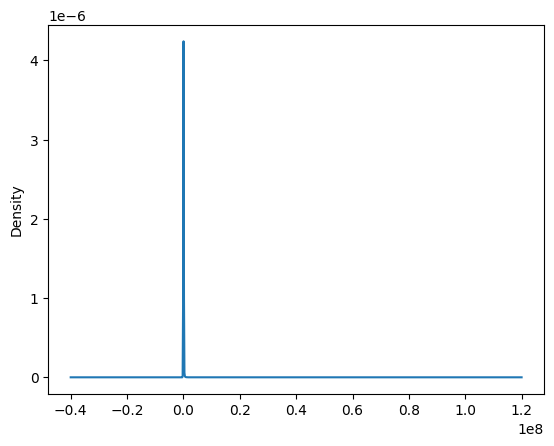

In [37]:
listings.price.plot.kde()

Revisando los precios maximos

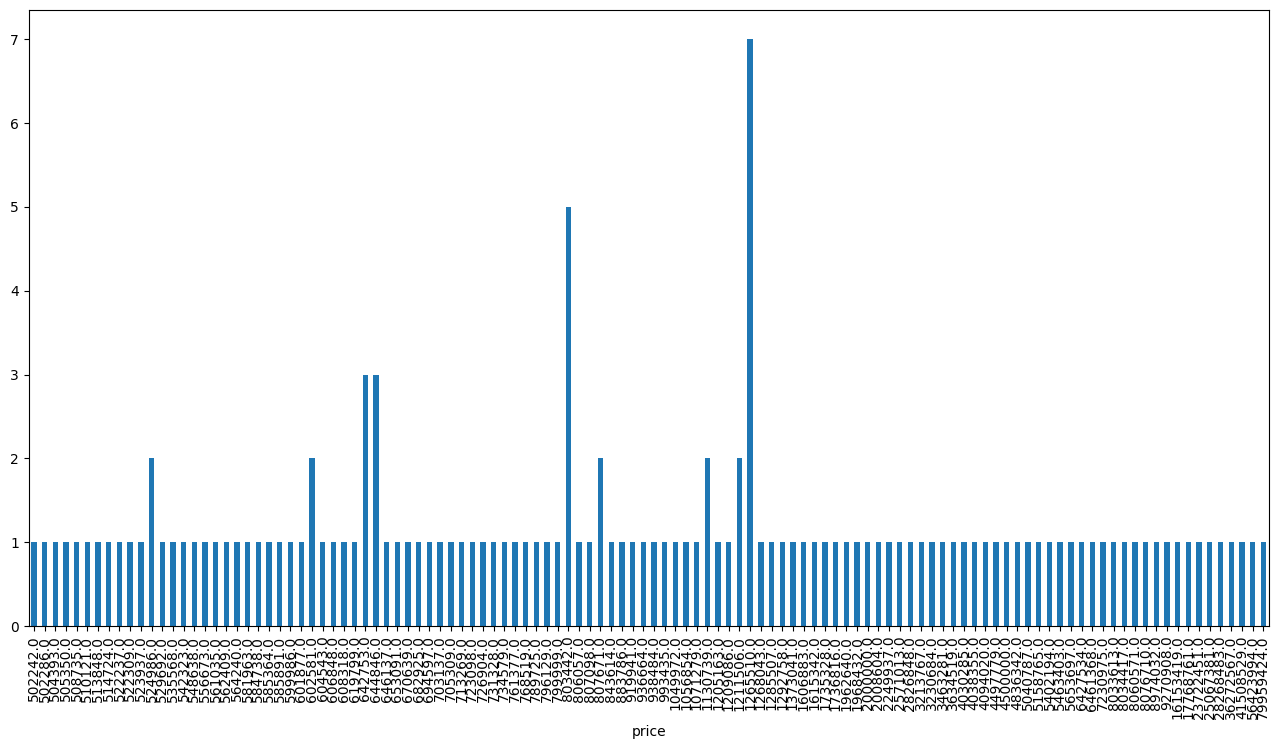

In [38]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 500000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

Algunos precios son disparatados, hay departamentos de cualquier precio superiores a 500000.
Y 7 departamentos que rondan el 1.200.000

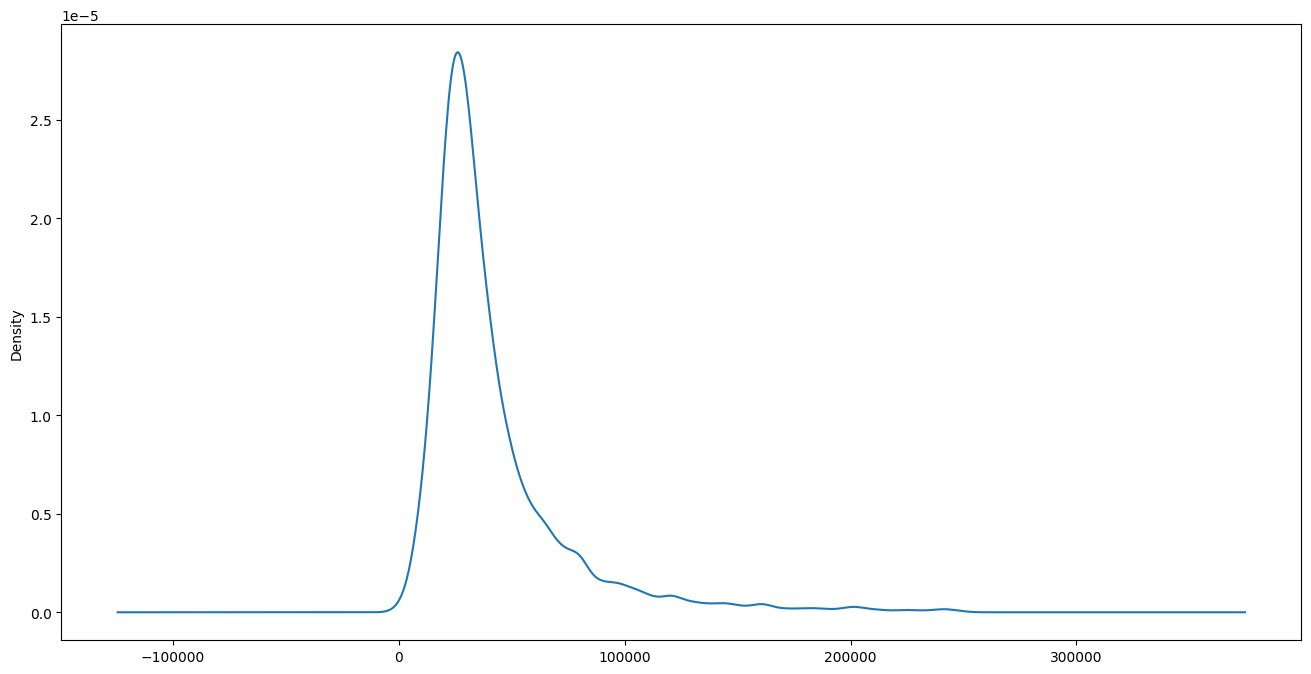

In [39]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 250000].plot.kde()
plt.xticks(size = 10);

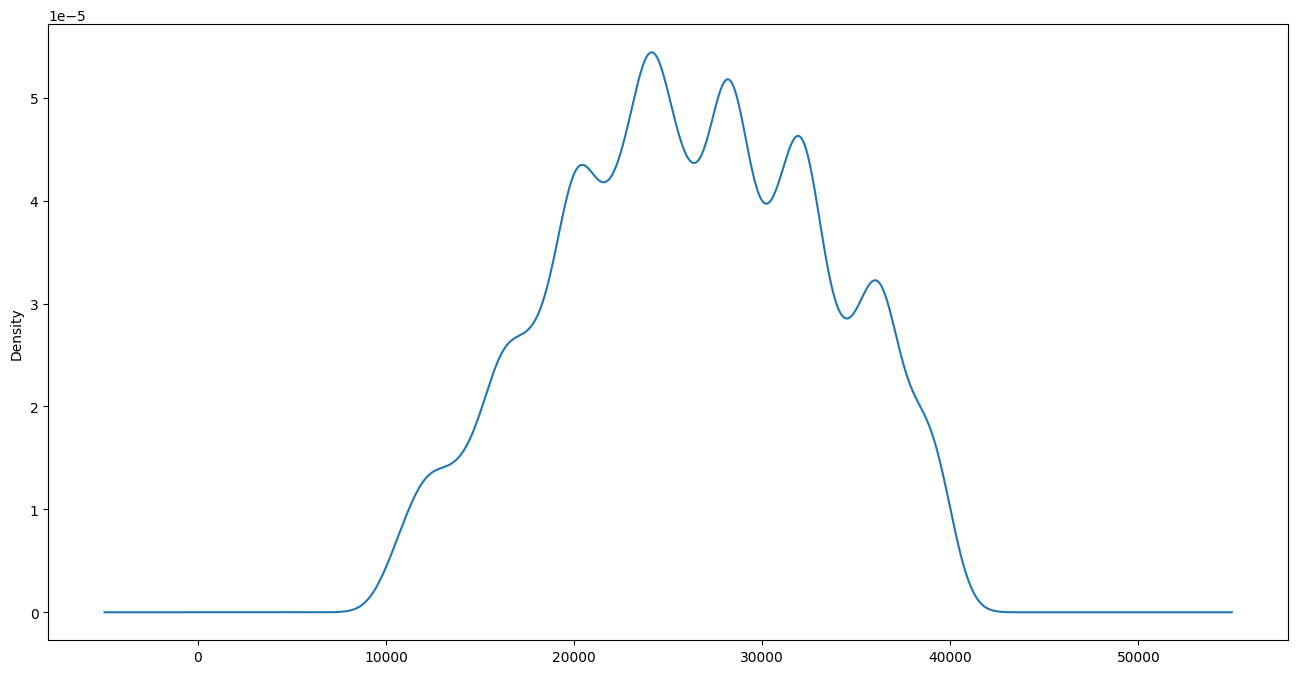

In [40]:
plt.figure(figsize=(16,8))
listings.price.loc[(listings.price > 10000) & (listings.price < 40000) ].plot.kde();
plt.xticks(size = 10);

Conclusión:

Se aprecia un amplio rango de precios, y parece que por debajo de 10.000 pesos sería difícil obtener rentabilidad, así que vamos a descartar los inmuebles que se alquilan por debajo de 10000 pesos y superiores a 40000.

Hay que tener en cuenta que estos precios de airbnb se encuentran en pesos argentinos al tipo de cambio del Banco Nación, falta agregar la tasa de impuestos o cambiarlos al tipo de cotización real.

In [41]:
listings = listings.loc[(listings.price > 10000) & (listings.price < 40000) ]
listings

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,8,161
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,1,0
5,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.622600,-58.387040,Entire home/apt,28268.0,15,1,0
6,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.602540,-58.378110,Entire home/apt,32242.0,1,8,78
8,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.599970,-58.412380,Entire home/apt,20151.0,7,1,364
...,...,...,...,...,...,...,...,...,...,...,...
33480,1054384310344899698,Rental unit in Buenos Aires · ★New · Studio · ...,254111419,Balvanera,-34.600971,-58.408723,Entire home/apt,12897.0,1,4,265
33481,1054392542343527929,Rental unit in Buenos Aires · ★New · 1 bedroom...,1409800,Recoleta,-34.596400,-58.408710,Entire home/apt,37998.0,2,104,270
33484,1054423956590467495,Rental unit in Buenos Aires · ★New · 1 bedroom...,112264250,Monserrat,-34.611055,-58.380419,Entire home/apt,18975.0,3,1,269
33486,1054454529559701183,Rental unit in Buenos Aires · ★New · 1 bedroom...,552579433,San Nicolas,-34.600817,-58.378126,Entire home/apt,24182.0,3,1,87


In [42]:
listings.iloc[:,7:11].describe().T

,count,mean,std,min,25%,50%,75%,max
price,20064.0,26125.307815,7054.579366,10019.0,20802.25,25907.0,31821.0,39980.0
minimum_nights,20064.0,5.056669,16.230273,1.0,2.00,3.0,4.0,900.0
calculated_host_listings_count,20064.0,16.479914,37.056256,1.0,1.00,2.0,11.0,263.0
availability_365,20064.0,202.512510,123.056691,0.0,87.00,217.0,327.0,365.0


En base a la calidad de datos realizada podemos obtener un promedio de 26.000 pesos de alquiler con una desviación tipica de 7.000 pesos.

Revisando minimo de noches

In [43]:
listings.minimum_nights.value_counts()

minimum_nights
2      5355
3      4797
1      4646
4      1400
5      1055
7       831
30      376
6       309
10      248
15      246
14      151
28      123
20       92
90       61
21       44
60       40
8        37
25       37
12       27
180      26
13       22
18       16
9        16
29       16
120      11
31        7
17        6
100       6
365       5
40        5
359       4
200       4
70        3
16        3
50        3
26        3
300       3
85        2
58        2
89        2
150       2
80        2
91        2
45        2
56        2
183       1
160       1
900       1
55        1
35        1
360       1
350       1
27        1
95        1
69        1
11        1
38        1
19        1
599       1
Name: count, dtype: int64

El minimo de noche tambien tiene un amplio rango de valores, podriamos filtrar los que se encuentran en el rango de 1 a 5 dias, pero como no es un core para el analisis, lo dejo asi.

### Tabla listings_det

#### Visión general

In [44]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,11508,https://www.airbnb.com/rooms/11508,20231226203815,2023-12-29,city scrape,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,NaN,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,...,4.97,4.92,4.87,None,f,1,1,0,0,0.28
1,1,14222,https://www.airbnb.com/rooms/14222,20231226203815,2023-12-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,NaN,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,...,4.89,4.87,4.75,None,f,8,8,0,0,0.82
2,2,15074,https://www.airbnb.com/rooms/15074,20231226203815,2023-12-29,previous scrape,Rental unit in Buenos Aires · 1 bedroom · 1 be...,NaN,None,https://a0.muscache.com/pictures/91166/c0fdcb4...,...,NaN,NaN,NaN,None,f,1,0,1,0,NaN
3,3,16695,https://www.airbnb.com/rooms/16695,20231226203815,2023-12-28,city scrape,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,...,4.80,4.39,4.41,None,t,9,9,0,0,0.29
4,4,20062,https://www.airbnb.com/rooms/20062,20231226203815,2023-12-28,city scrape,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,NaN,None,https://a0.muscache.com/pictures/165679/2eb448...,...,4.93,4.93,4.78,None,f,4,4,0,0,1.83


In [45]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         33490 non-null  int64  
 1   id                                            33490 non-null  int64  
 2   listing_url                                   33490 non-null  object 
 3   scrape_id                                     33490 non-null  int64  
 4   last_scraped                                  33490 non-null  object 
 5   source                                        33490 non-null  object 
 6   name                                          33490 non-null  object 
 7   description                                   0 non-null      float64
 8   neighborhood_overview                         18076 non-null  object 
 9   picture_url                                   33490 non-null 

#### Variables y Tipos

Vamos a seleccionar solo aquellas variables que nos aporten información relevante para nuestros objetivos.

In [46]:
a_incluir = ['id',
              'neighbourhood_cleansed',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bathrooms_text',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]


listings_det = listings_det.loc[:,a_incluir]

listings_det

,id,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,11508,Palermo,t,2,NaN,1 bath,NaN,1.0,39,4.79,4.97,4.92
1,14222,Palermo,t,2,NaN,1 bath,NaN,1.0,114,4.77,4.89,4.87
2,15074,Nuñez,f,1,NaN,1 bath,NaN,1.0,0,NaN,NaN,NaN
3,16695,Monserrat,t,4,NaN,1 bath,NaN,1.0,45,4.28,4.80,4.39
4,20062,Palermo,t,4,NaN,1.5 baths,NaN,2.0,303,4.93,4.93,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...
33485,1054431162045157969,Chacarita,f,6,NaN,2 baths,NaN,5.0,0,NaN,NaN,NaN
33486,1054454529559701183,San Nicolas,f,2,NaN,1 bath,NaN,1.0,0,NaN,NaN,NaN
33487,1054467234472982003,Palermo,f,5,NaN,2.5 baths,NaN,6.0,0,NaN,NaN,NaN
33488,1054474254373168834,Balvanera,f,3,NaN,1 bath,NaN,1.0,0,NaN,NaN,NaN


Analizamos los tipos

In [47]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           33490 non-null  int64  
 1   neighbourhood_cleansed       33490 non-null  object 
 2   host_is_superhost            33424 non-null  object 
 3   accommodates                 33490 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bathrooms_text               33471 non-null  object 
 6   bedrooms                     0 non-null      float64
 7   beds                         32560 non-null  float64
 8   number_of_reviews            33490 non-null  int64  
 9   review_scores_rating         27404 non-null  float64
 10  review_scores_communication  27399 non-null  float64
 11  review_scores_location       27397 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 3.1+ MB


Conclusión: pasar host_is_superhost a categórica.

In [48]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
    
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  object  
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bathrooms_text               33471 non-null  object  
 6   bedrooms                     0 non-null      float64 
 7   beds                         32560 non-null  float64 
 8   number_of_reviews            33490 non-null  int64   
 9   review_scores_rating         27404 non-null  float64 
 10  review_scores_communication  27399 non-null  float64 
 11  review_scores_location       27397 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(2)
memory usage

#### Analisis de Nulos

In [49]:
listings_det.isna().sum()

id                                 0
neighbourhood_cleansed             0
host_is_superhost                 66
accommodates                       0
bathrooms                      33490
bathrooms_text                    19
bedrooms                       33490
beds                             930
number_of_reviews                  0
review_scores_rating            6086
review_scores_communication     6091
review_scores_location          6093
dtype: int64

Conclusiones:
* bathrooms y bedrooms tienen todos los valores nulos, los elimino.
* bathrooms_text tiene 19 valores nulos y cuenta con la infomacion de los baños que tiene cada departamento (despues puedo cambiar de nombre), lo dejamos y los nulos faltantes los puedo imputar de acuerdo por la variable accomodates.
* de la misma manera con beds, de acuerdo a la cantidad en accomodate, se pueden obtener la cantidad de camas.

**A revisar** Ver si puedo hacer una imputación de beds a partir del número de personas que se pueden acomodar.

Con una tabla cruzada, se puede obtener un parametro de la cantidad de camas que puede tener un departamento, teniendo en cuenta la capacidad para alojar.

In [50]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
1.0,1321,13218,1436,626,22,18,2,1,0,1,1,1,0,2,2,1
2.0,110,2157,3651,2137,80,29,2,3,0,0,0,0,1,1,0,0
3.0,10,154,746,3170,381,185,17,3,0,3,0,1,0,0,0,0
4.0,11,33,99,717,600,297,40,33,3,2,0,0,0,0,0,1
5.0,8,3,5,66,160,261,42,34,11,7,0,0,0,0,0,0
6.0,12,10,5,30,15,102,30,31,7,9,1,6,1,1,0,0
7.0,6,2,0,3,1,7,16,34,7,8,4,5,1,3,0,0
8.0,8,0,0,5,1,4,3,30,9,7,1,4,0,1,0,2
9.0,1,0,1,2,0,2,0,1,13,11,3,0,1,0,1,3


Conclusión:

* una o dos personas se suelen corresponder con una cama
* tres o cuatro personas se suelen corresponder con dos camas
* cinco o seis personas se suelen corresponder con tres camas
* a más de 6 personas le vamos a poner cuatro camas

In [51]:
listings_det.beds.value_counts(dropna = False)

beds
1.0     16652
2.0      8171
3.0      4670
4.0      1836
NaN       930
5.0       597
6.0       260
7.0        97
8.0        75
9.0        39
10.0       35
12.0       28
14.0       25
11.0       15
16.0       14
15.0       12
13.0        6
20.0        5
30.0        3
19.0        3
17.0        3
26.0        2
23.0        1
70.0        1
22.0        1
42.0        1
32.0        1
25.0        1
31.0        1
21.0        1
18.0        1
28.0        1
33.0        1
27.0        1
Name: count, dtype: int64

**Se genera una función para imputar los nulos de beds.**

Para 2 o menos personas - 1 cama
Para más de 2 hasta 3 - 2 camas
Para 4 hasta 5 - 3 camas
Para más de 6 - 4 camas


In [52]:
def imputar_nulos_beds(registro):
    condiciones = [ (registro.accommodates <= 2),
                    (registro.accommodates > 2) & (registro.accommodates <= 4),
                    (registro.accommodates > 2) & (registro.accommodates <= 6),
                    (registro.accommodates > 6)]
    resultados = [1, 2, 3, 4]

    return(np.select(condiciones, resultados, default = -999))

Para filtrar los registros que tienen la variable beds en nulo **listings_det.loc[listings_det.beds.isna(), 'beds']** y con *,beds* que escriba en esa variable el resultado de la función.

* listings_det.loc[listings_det.beds.isna(), 'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos_beds, axis=1).astype('float64')

In [53]:
listings_det.loc[listings_det.beds.isna(), 'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos_beds, axis=1).astype('float64')

Comprobamos

In [54]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  object  
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bathrooms_text               33471 non-null  object  
 6   bedrooms                     0 non-null      float64 
 7   beds                         33490 non-null  float64 
 8   number_of_reviews            33490 non-null  int64   
 9   review_scores_rating         27404 non-null  float64 
 10  review_scores_communication  27399 non-null  float64 
 11  review_scores_location       27397 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(2)
memory usage

**Analisando los nulos de bathrooms**

In [55]:
listings_det.bathrooms_text.value_counts()

bathrooms_text
1 bath               23711
1.5 baths             3734
2 baths               2426
1 shared bath          886
2.5 baths              627
1 private bath         573
3 baths                327
1.5 shared baths       234
2 shared baths         206
3.5 baths              130
3 shared baths         118
4 baths                 78
2.5 shared baths        67
4.5 baths               38
0 baths                 34
5 baths                 32
Half-bath               30
4 shared baths          29
5 shared baths          27
3.5 shared baths        23
6 baths                 17
0 shared baths          16
9 baths                 12
6 shared baths          10
6.5 shared baths        10
Shared half-bath         9
8 baths                  9
5.5 baths                7
7 baths                  6
8.5 shared baths         5
6.5 baths                5
4.5 shared baths         5
7 shared baths           4
Private half-bath        3
10 baths                 3
9 shared baths           3
8.5 baths    

No es claro la referencia de la variable **bathrooms_text**, por lo que vamos a obtener un estimativo teniendo en cuenta la capcidad para hospedar.

Imputamos los nulos con una funcion, teniendo en cuenta que:
* Para 5 personas - 1 baño.
* Para 6 a 10 - 2 baños.
* Para mas de 10 personas - consideramos 3 baños.

In [56]:
def imputar_nulos_bath(registro):
    condiciones = [ (registro.accommodates <= 5),
                    (registro.accommodates > 5) & (registro.beds <= 10),
                    (registro.beds > 10)]
    resultados = [1, 2, 3]

    return(np.select(condiciones, resultados, default = -999))

listings_det.loc[listings_det.bathrooms.isna(), 'bathrooms'] = listings_det.loc[listings_det.bathrooms.isna()].apply(imputar_nulos_bath, axis=1).astype('float64')

Comprobando

In [57]:
listings_det['bathrooms'].value_counts(dropna = False)

bathrooms
1.0    31959
2.0     1420
3.0      111
Name: count, dtype: int64

Analisando los nulos de **bedrooms**.

Se puede hacer una asignacion directa teniendo en cuenta el numero de camas que tiene el departamento.

* cero, una o dos camas se suele corresponder con una habitación
* tres o cuatro camas se suele corresponder con dos habitaciones
* cinco o seis camas se suele corresponder con tres habitaciones
* a más camas le vamos a poner cuatro habitaciones

In [58]:
def imputar_nulos_bedrooms(registro):
    condiciones = [ (registro.beds <= 2),
                    (registro.beds > 2 ) & (registro.beds <= 4),
                    (registro.beds > 4 ) & (registro.beds <= 6),
                    (registro.beds > 6 )]
    resultados = [1, 2, 3, 4]
    return(np.select(condiciones, resultados, default = -999))

In [59]:
listings_det.loc[listings_det.bedrooms.isna(), 'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(imputar_nulos_bedrooms, axis = 1).astype('float64')

In [60]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  object  
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    33490 non-null  float64 
 5   bathrooms_text               33471 non-null  object  
 6   bedrooms                     33490 non-null  float64 
 7   beds                         33490 non-null  float64 
 8   number_of_reviews            33490 non-null  int64   
 9   review_scores_rating         27404 non-null  float64 
 10  review_scores_communication  27399 non-null  float64 
 11  review_scores_location       27397 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(2)
memory usage

In [61]:
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna = False)

beds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,25.0,26.0,27.0,28.0,30.0,31.0,32.0,33.0,42.0,70.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,17257,8454,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,4706,1842,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,597,260,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,97,75,39,35,...,1,2,1,1,3,1,1,1,1,1


Se elimina la variable bedrooms_text 

In [62]:
listings_det.drop(columns = 'bathrooms_text', inplace = True)
listings_det

,id,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,11508,Palermo,t,2,1.0,1.0,1.0,39,4.79,4.97,4.92
1,14222,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87
2,15074,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN
3,16695,Monserrat,t,4,1.0,1.0,1.0,45,4.28,4.80,4.39
4,20062,Palermo,t,4,1.0,1.0,2.0,303,4.93,4.93,4.93
...,...,...,...,...,...,...,...,...,...,...,...
33485,1054431162045157969,Chacarita,f,6,2.0,3.0,5.0,0,NaN,NaN,NaN
33486,1054454529559701183,San Nicolas,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN
33487,1054467234472982003,Palermo,f,5,1.0,3.0,6.0,0,NaN,NaN,NaN
33488,1054474254373168834,Balvanera,f,3,1.0,1.0,1.0,0,NaN,NaN,NaN


#### Analisis de duplicados

Comprobamos si hay algún registro duplicado

In [63]:
listings_det.duplicated().sum()

0

#### Analisis de variables categoricas

In [64]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  object  
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    33490 non-null  float64 
 5   bedrooms                     33490 non-null  float64 
 6   beds                         33490 non-null  float64 
 7   number_of_reviews            33490 non-null  int64   
 8   review_scores_rating         27404 non-null  float64 
 9   review_scores_communication  27399 non-null  float64 
 10  review_scores_location       27397 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.6+ MB


Se cambia **neighbourhood_cleansed** al tipo de categoria.

In [65]:
listings_det['neighbourhood_cleansed'] = listings_det['neighbourhood_cleansed'].astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  category
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    33490 non-null  float64 
 5   bedrooms                     33490 non-null  float64 
 6   beds                         33490 non-null  float64 
 7   number_of_reviews            33490 non-null  int64   
 8   review_scores_rating         27404 non-null  float64 
 9   review_scores_communication  27399 non-null  float64 
 10  review_scores_location       27397 non-null  float64 
dtypes: category(2), float64(6), int64(3)
memory usage: 2.4 MB


#### Analisis de variables númericas

In [66]:
listings_det.iloc[:,3:11].describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,33490.0,2.912242,1.496780,1.0,2.00,2.00,4.0,16.0
bathrooms,33490.0,1.049030,0.230773,1.0,1.00,1.00,1.0,3.0
bedrooms,33490.0,1.280203,0.565582,1.0,1.00,1.00,1.0,4.0
beds,33490.0,1.917916,1.544693,1.0,1.00,1.00,2.0,70.0
number_of_reviews,33490.0,22.562168,38.812298,0.0,1.00,8.00,27.0,687.0
review_scores_rating,27404.0,4.775897,0.367571,1.0,4.71,4.88,5.0,5.0
review_scores_communication,27399.0,4.855514,0.329141,0.0,4.83,4.96,5.0,5.0
review_scores_location,27397.0,4.866290,0.269839,0.0,4.83,4.94,5.0,5.0


Aparentemente no se observa nada raro.

En este punto se ha detectado y corregido los principales problemas de calidad de datos, así que se procede a crear el datamart analítico integrando nuestras tablas.

## DATAMART ANALITICO

Tenemos 2 tablas principales:

* listings
* listings_det

Y sabemos que ambas comparten el campo **id**, por tanto podemos cruzarlas por él.

La tabla principal es listings, ya que la de detalle lo que hace es darnos datos adicionales.

Por tanto la tabla que ha de mandar en la integración es listings.

Además tambien tenemos la tabla del precio, que en este caso cruza conceptualmente con listings a través del distrito (**neighbourhood_group**).

Aun no se comprobó que los literales sean iguales, por tanto quizá será necesario hacer alguna corrección manual.

Se empieza por las 2 principales.

Dado que va a mandar la tabla listings el resultado final tendrá que tener tantas filas como listings y tantas columnas como las de ambas tablas (menos 1 por el id que se quedará como una única variable)

In [67]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20064 entries, 1 to 33488
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20064 non-null  int64   
 1   name                            20064 non-null  object  
 2   host_id                         20064 non-null  int64   
 3   neighbourhood                   20064 non-null  category
 4   latitude                        20064 non-null  float64 
 5   longitude                       20064 non-null  float64 
 6   room_type                       20064 non-null  category
 7   price                           20064 non-null  float64 
 8   minimum_nights                  20064 non-null  int64   
 9   calculated_host_listings_count  20064 non-null  int64   
 10  availability_365                20064 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [68]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           33490 non-null  int64   
 1   neighbourhood_cleansed       33490 non-null  category
 2   host_is_superhost            33424 non-null  category
 3   accommodates                 33490 non-null  int64   
 4   bathrooms                    33490 non-null  float64 
 5   bedrooms                     33490 non-null  float64 
 6   beds                         33490 non-null  float64 
 7   number_of_reviews            33490 non-null  int64   
 8   review_scores_rating         27404 non-null  float64 
 9   review_scores_communication  27399 non-null  float64 
 10  review_scores_location       27397 non-null  float64 
dtypes: category(2), float64(6), int64(3)
memory usage: 2.4 MB


Si sale bien tendría que tener 20064 filas y 21 columnas.

In [69]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id' )
df

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,...,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,8,...,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87
1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,1,...,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN
2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.622600,-58.387040,Entire home/apt,28268.0,15,1,...,Constitucion,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN
3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.602540,-58.378110,Entire home/apt,32242.0,1,8,...,San Nicolas,t,3,1.0,1.0,2.0,377,4.66,4.90,4.84
4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.599970,-58.412380,Entire home/apt,20151.0,7,1,...,Almagro,f,2,1.0,1.0,2.0,2,3.50,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,1054384310344899698,Rental unit in Buenos Aires · ★New · Studio · ...,254111419,Balvanera,-34.600971,-58.408723,Entire home/apt,12897.0,1,4,...,Balvanera,t,2,1.0,1.0,1.0,0,NaN,NaN,NaN
20060,1054392542343527929,Rental unit in Buenos Aires · ★New · 1 bedroom...,1409800,Recoleta,-34.596400,-58.408710,Entire home/apt,37998.0,2,104,...,Recoleta,t,3,1.0,1.0,2.0,0,NaN,NaN,NaN
20061,1054423956590467495,Rental unit in Buenos Aires · ★New · 1 bedroom...,112264250,Monserrat,-34.611055,-58.380419,Entire home/apt,18975.0,3,1,...,Monserrat,f,2,1.0,1.0,2.0,0,NaN,NaN,NaN
20062,1054454529559701183,Rental unit in Buenos Aires · ★New · 1 bedroom...,552579433,San Nicolas,-34.600817,-58.378126,Entire home/apt,24182.0,3,1,...,San Nicolas,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN


Ahora necesito incluir la información de precio x m2, pero tengo que ver que los nombres de los barrios coincidan.

Para ello lo primero es analizar los valores de la variable distrito en ambas tablas, ya que necesitan coincidir para que podamos cruzarlos.

En df la variable es categórica, así que para sacar los niveles tenemos que usar .categories

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20064 non-null  int64   
 1   name                            20064 non-null  object  
 2   host_id                         20064 non-null  int64   
 3   neighbourhood                   20064 non-null  category
 4   latitude                        20064 non-null  float64 
 5   longitude                       20064 non-null  float64 
 6   room_type                       20064 non-null  category
 7   price                           20064 non-null  float64 
 8   minimum_nights                  20064 non-null  int64   
 9   calculated_host_listings_count  20064 non-null  int64   
 10  availability_365                20064 non-null  int64   
 11  neighbourhood_cleansed          20064 non-null  category
 12  host_is_superhost 

In [71]:
distrito1 = pd.Series(df.neighbourhood.unique().categories).sort_values()
distrito1

0             Agronomia
1               Almagro
2             Balvanera
3              Barracas
4              Belgrano
5                  Boca
6                 Boedo
7             Caballito
8             Chacarita
9               Coghlan
10           Colegiales
11         Constitucion
12               Flores
13             Floresta
14              Liniers
15            Mataderos
16            Monserrat
17         Monte Castro
18        Nueva Pompeya
19                Nuñez
20              Palermo
21    Parque Avellaneda
22     Parque Chacabuco
23          Parque Chas
24     Parque Patricios
25             Paternal
26        Puerto Madero
27             Recoleta
28               Retiro
29             Saavedra
30        San Cristobal
31          San Nicolas
32            San Telmo
33      Velez Sarsfield
34            Versalles
35         Villa Crespo
36     Villa Del Parque
37         Villa Devoto
38    Villa Gral. Mitre
39         Villa Lugano
40           Villa Luro
41        Villa 

In [72]:
precio_m2.barrio.sort_values()

20              Agronomía
25                Almagro
7               Balvanera
23               Barracas
44               Belgrano
19                  Boedo
31              Caballito
37              Chacarita
39                Coghlan
40             Colegiales
8            Constitución
16                 Flores
5                Floresta
2                 La Boca
24                Liniers
0                  Lugano
11              Mataderos
22              Monserrat
21           Monte Castro
1           Nueva Pompeya
43                  Núñez
45                Palermo
4       Parque Avellaneda
27       Parque Chacabuco
34            Parque Chas
6        Parque Patricios
17               Paternal
46          Puerto Madero
41               Recoleta
42                 Retiro
35               Saavedra
9           San Cristóbal
10            San Nicolás
30              San Telmo
15             Santa Rita
18              Versalles
33           Villa Crespo
36           Villa Devoto
13    Villa 

Comparando parece todo igual excepto:

* Agronomia - Agronomía
* Boca - La Boca
* Constitucion - Constitución
* Villa Lugano - Lugano
* Nuñez - Núñez
* San Cristobal - San Cristóbal
* San Nicolas - San Nicolás
* Villa Gral. Mitre - Villa General Mitre
* Villa Del Parque - Villa del Parque
* Villa Pueyrredon - Villa Pueyrredón
* Velez Sarsfield - Vélez Sarsfield

Por tanto vamos a reemplazar estos valores en precio_m2 para que sean iguales a los de df y podamos cruzarlos

In [73]:
precio_m2.barrio = precio_m2.barrio.map({'Agronomía' : 'Agronomia',
                                         'La Boca' : 'Boca',
                                         'Constitución' : 'Constitucion',
                                         'Lugano' : 'Villa Lugano',
                                         'Núñez' : 'Nuñez',
                                         'San Cristóbal' : 'San Cristobal',
                                         'San Nicolás' : 'San Nicolas',
                                         'Villa General Mitre' : 'Villa Gral. Mitre',
                                         'Villa del Parque' : 'Villa Del Parque',
                                         'Villa Pueyrredón' : 'Villa Pueyrredon',
                                         'Vélez Sarsfield' : 'Velez Sarsfield'}) \
                                   .fillna(precio_m2.barrio)
precio_m2

,index,barrio,precio_m2
0,0,Villa Lugano,1016
1,1,Nueva Pompeya,1391
2,2,Boca,1439
3,3,Villa Riachuelo,1471
4,4,Parque Avellaneda,1480
5,5,Floresta,1606
6,6,Parque Patricios,1612
7,7,Balvanera,1628
8,8,Constitucion,1650
9,9,San Cristobal,1664


falta el precio del metro cuadrado en el barrio: **'Villa Santa Rita'**.

In [74]:
precio_m2.loc[47] = [47,'Villa Santa Rita', 1485]
precio_m2

,index,barrio,precio_m2
0,0,Villa Lugano,1016
1,1,Nueva Pompeya,1391
2,2,Boca,1439
3,3,Villa Riachuelo,1471
4,4,Parque Avellaneda,1480
5,5,Floresta,1606
6,6,Parque Patricios,1612
7,7,Balvanera,1628
8,8,Constitucion,1650
9,9,San Cristobal,1664


Ahora si lo podemos cruzar.

Manda df.

In [75]:
df = pd.merge(left = df, right = precio_m2, how = 'left', left_on = 'neighbourhood', right_on = 'barrio' )
df

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,...,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2
0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,8,...,1.0,1.0,1.0,114,4.77,4.89,4.87,45,Palermo,2917
1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,1,...,1.0,1.0,1.0,0,NaN,NaN,NaN,43,Nuñez,2643
2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.622600,-58.387040,Entire home/apt,28268.0,15,1,...,1.0,1.0,1.0,0,NaN,NaN,NaN,8,Constitucion,1650
3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.602540,-58.378110,Entire home/apt,32242.0,1,8,...,1.0,1.0,2.0,377,4.66,4.90,4.84,10,San Nicolas,1734
4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.599970,-58.412380,Entire home/apt,20151.0,7,1,...,1.0,1.0,2.0,2,3.50,5.00,5.00,25,Almagro,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,1054384310344899698,Rental unit in Buenos Aires · ★New · Studio · ...,254111419,Balvanera,-34.600971,-58.408723,Entire home/apt,12897.0,1,4,...,1.0,1.0,1.0,0,NaN,NaN,NaN,7,Balvanera,1628
20060,1054392542343527929,Rental unit in Buenos Aires · ★New · 1 bedroom...,1409800,Recoleta,-34.596400,-58.408710,Entire home/apt,37998.0,2,104,...,1.0,1.0,2.0,0,NaN,NaN,NaN,41,Recoleta,2510
20061,1054423956590467495,Rental unit in Buenos Aires · ★New · 1 bedroom...,112264250,Monserrat,-34.611055,-58.380419,Entire home/apt,18975.0,3,1,...,1.0,1.0,2.0,0,NaN,NaN,NaN,22,Monserrat,1942
20062,1054454529559701183,Rental unit in Buenos Aires · ★New · 1 bedroom...,552579433,San Nicolas,-34.600817,-58.378126,Entire home/apt,24182.0,3,1,...,1.0,1.0,1.0,0,NaN,NaN,NaN,10,San Nicolas,1734


In [76]:
df.precio_m2.isna().sum()

0

## GUARDAR EN LA BASE DE DATOS

Ahora que ya tengo el tablón de análisis lo guardo en la base de datos para que cada vez que necesite hacer el análisis no tenga que repetir todo el procesamiento de este notebook.

In [77]:
df.to_sql('df', con = con, if_exists = 'replace')

20064

corroboramos las tablas de la base de datos

In [78]:
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df', 'listings', 'listings_det', 'precio_m2']